# SVM 
- Supervised

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns; sns.set()
from sklearn import metrics
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
%matplotlib inline 
import matplotlib.pyplot as plt

Formulas and explanation [towardsdatascience](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)

<h2 id="load_dataset">Load the Cancer data</h2>

The example is based on a dataset that is publicly available from the [UCI Machine Learning Repository](http://mlearn.ics.uci.edu/MLRepository.html). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|



In [2]:
df = pd.read_csv("../Datasets/Week8/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


benign (value = 2) or malignant (value = 4).

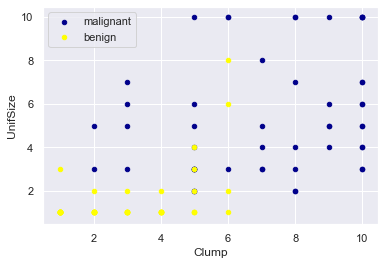

In [3]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [4]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

__BareNuc__ column includes some values that are not numerical, drop those

In [5]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [6]:
features_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(features_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [7]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


The SVM algorithm offers us a variety of functions. Mainly, mapping data into higher dimensional space is called kernelling. The mathematical transformation used is known as the kernel function and can be of different types, such as:

1. linear
2. polynomial
3. Radial Base Function (RBF)
4. sigmoid

Each of these functions has its pros and cons, since there is no easy way to know which function works best with a given data set, we generally choose different functions and compare the results.

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_predict = clf.predict(X_test)
y_predict [0:5]

array([2, 4, 2, 4, 2])

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
def plot_confusion_matrix_adjust(cm, classes, normalize=False,title='Confusion matrix'):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    fig, ax = plt.subplots()
    ticks_marks = np.arange(len(classes))
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g',yticklabels=classes,xticklabels=classes) 
    ax.xaxis.set_label_position('top')
    ax.autoscale(enable=True) # To fix scale 
    
    plt.tight_layout()
    plt.title(title, y = 1.1)
    plt.ylabel('Actual Label')
    plt.xlabel('Prediction Label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

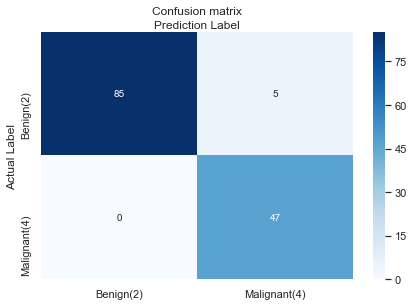

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_adjust(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='weighted') 

0.9639038982104676

In [16]:
y_predict

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_predict)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9635036496350365

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

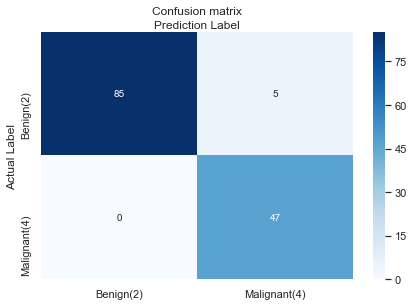

In [18]:
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
y_predict [0:5]
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_adjust(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [19]:
print('F1_Score', f1_score(y_test, y_predict, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict))

F1_Score 0.9639038982104676
Jaccard 0.9635036496350365


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

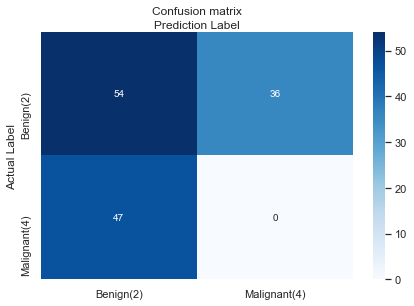

In [20]:
clf = svm.SVC(kernel='sigmoid', gamma='scale')
clf.fit(X_train, y_train) 
y_predict = clf.predict(X_test)
y_predict [0:5]
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_adjust(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [21]:
print('F1_Score', f1_score(y_test, y_predict, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict))

F1_Score 0.3714602361753353
Jaccard 0.39416058394160586


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Reference code for the next example [jakevdp.github.io](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

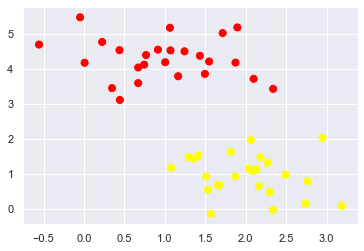

In [22]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

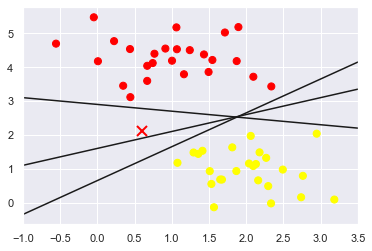

In [23]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Maximizing the Margin

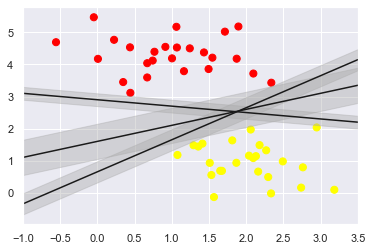

In [24]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [25]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

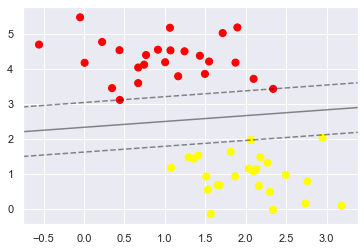

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [28]:
model.support_vectors_

array([[0.44, 3.12],
       [2.34, 3.43],
       [2.06, 1.97]])

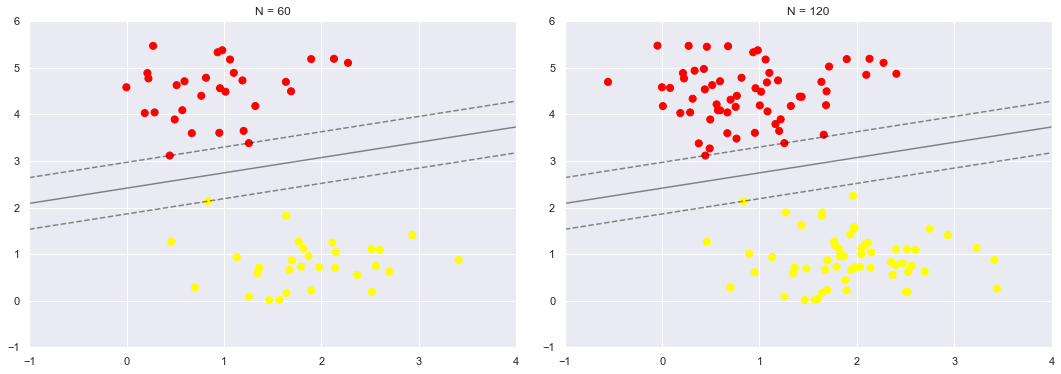

In [29]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [31]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,100, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Output()), _dom_classes=('w…

<function __main__.plot_svm(N=10, ax=None)>

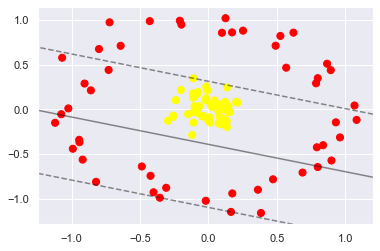

In [32]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [33]:
r = np.exp(-(X ** 2).sum(1))

In [34]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.08, -0.05],
       [ 0.79,  0.29],
       [ 0.36, -0.9 ],
       [-0.08, -0.04],
       [-0.1 ,  0.04],
       [-0.94, -0.37],
       [-0.02,  0.26],
       [ 0.07, -0.02],
       [-0.2 ,  0.95],
       [-0.09,  0.17],
       [-0.43,  0.99],
       [ 0.13, -0.13],
       [ 0.08, -0.08],
       [ 0.96, -0.31],
       [ 0.17,  0.86],
       [ 0.89,  0.44],
       [-0.42, -0.74],
       [ 0.01, -0.14],
       [-0.01,  0.21],
       [-0.73,  0.44],
       [ 0.04,  0.1 ],
       [-0.11,  0.13],
       [-1.12, -0.15],
       [ 0.03,  0.03],
       [-0.07,  0.04],
       [-0.11,  0.35],
       [-0.11,  0.18],
       [-1.02,  0.01],
       [-0.04, -0.07],
       [ 0.01, -0.15],
       [-0.82, -0.81],
       [ 0.13, -0.2 ],
       [ 0.16, -1.15],
       [ 0.15, -0.03],
       [ 0.12,  0.09],
       [-0.92, -0.56],
       [ 0.62,  0.86],
       [-0.15, -0.05],
       [ 0.93, -0.14],
       [ 0.57,  0.47],
       [-0.31, -0.88],
       [ 0

In [35]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

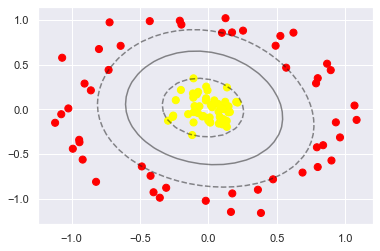

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

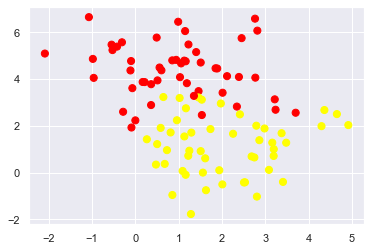

In [37]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

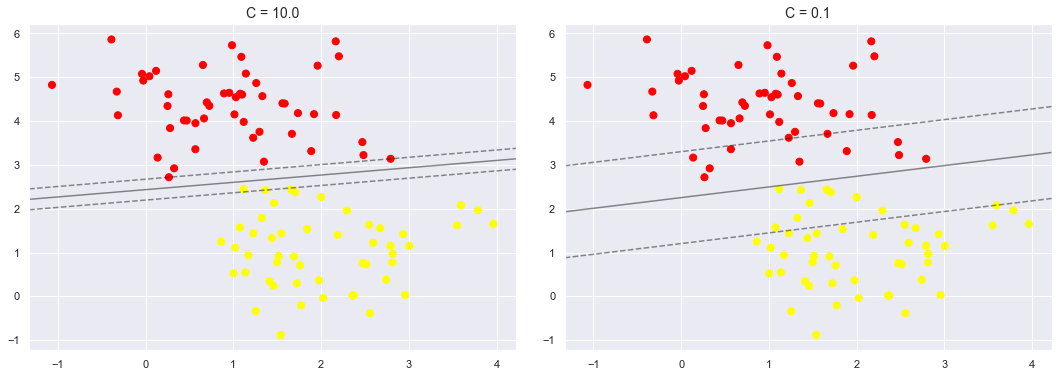

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Other Example

In [39]:
df = pd.read_csv("../Datasets/Week8/bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:
df.shape

(1372, 5)

In [41]:
X = df.drop('Class', axis=1)
y = df['Class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [43]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

[[150   3]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.98      0.98      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Confusion matrix, without normalization


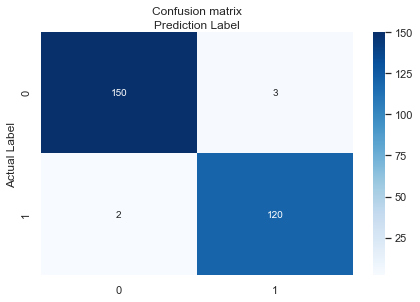

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=df['Class'].unique().tolist(),normalize= False,  title='Confusion matrix')

## Other dataset

In [46]:
iris = datasets.load_iris()

cols = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

irisdata = pd.DataFrame(iris.data, columns=cols)

In [47]:
X = irisdata
y = iris.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Polynomial

In [49]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = svclassifier.predict(X_test)

[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94         9
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization


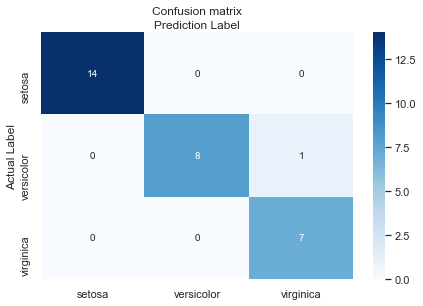

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=iris.target_names,normalize= False,  title='Confusion matrix')

### Gaussian  

In [52]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred = svclassifier.predict(X_test)

[[14  0  0]
 [ 0  8  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94         9
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization


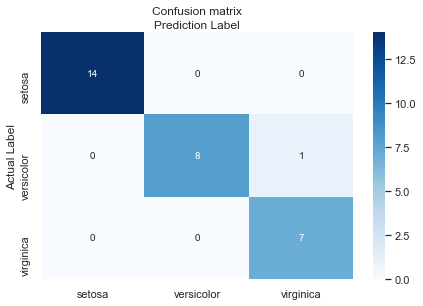

In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=iris.target_names,normalize= False,  title='Confusion matrix')

### Sigmoid

In [55]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pred = svclassifier.predict(X_test)

[[ 0  0 14]
 [ 0  0  9]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         9
           2       0.23      1.00      0.38         7

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30

Confusion matrix, without normalization


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


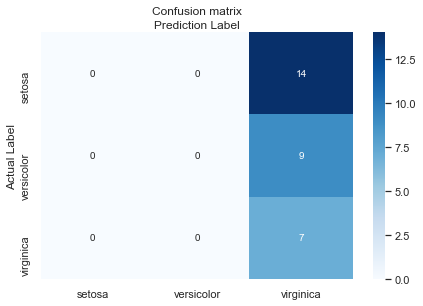

In [57]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=iris.target_names,normalize= False,  title='Confusion matrix')

### Images Examples

In [58]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


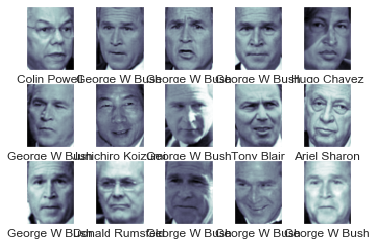

In [59]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
    

In [60]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


C:\Users\TheGlitchCat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 17.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [63]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

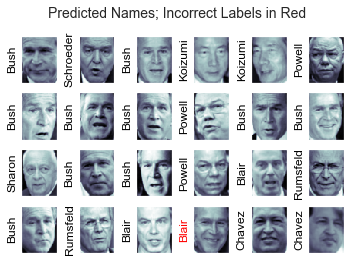

In [64]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [65]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Confusion matrix, without normalization


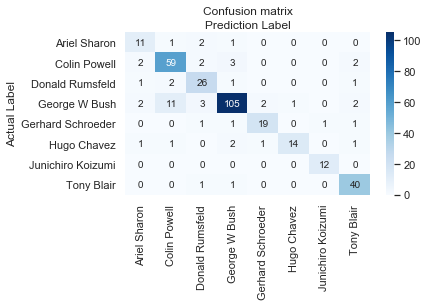

In [66]:
cnf_matrix = confusion_matrix(ytest, yfit)
plot_confusion_matrix_adjust(cnf_matrix, classes=faces.target_names,normalize= False,  title='Confusion matrix')

### Other Dataset

In [67]:
cancer = datasets.load_breast_cancer()

In [68]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [69]:
cancer.data.shape

(569, 30)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

In [71]:
svclassifier = svm.SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9369369369369369
Recall: 0.9811320754716981


[[ 58   7]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.94      0.98      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion matrix, without normalization


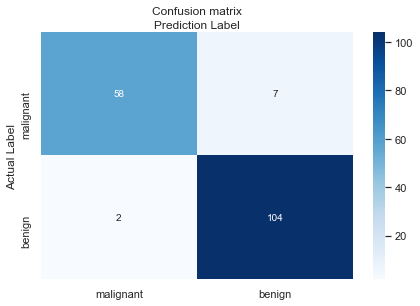

In [73]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=cancer.target_names,normalize= False,  title='Confusion matrix')

### Other Dataset

In [74]:
digits = datasets.load_digits()
print(digits.data)
print(digits.target)

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [75]:
digitsc = SVC()
digitsc = SVC(gamma=0.001, C=100)
digitsc.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = digitsc.predict(x_test)
y_pred

array([0, 5, 8, 1, 2, 7, 9, 6, 4, 3, 1, 5, 5, 5, 3, 3, 5, 9, 9, 0, 1, 6,
       2, 7, 2, 6, 4, 1, 6, 5, 0, 1, 7, 7, 3, 5, 1, 6, 1, 9, 8, 8, 7, 6,
       3, 4, 3, 2, 9, 4, 7, 2, 5, 4, 2, 8, 7, 6, 5, 1, 1, 0, 7, 8, 3, 9,
       9, 5, 7, 6, 9, 2, 5, 5, 3, 7, 9, 4, 5, 6, 7, 7, 4, 9, 1, 4, 7, 8,
       8, 9, 1, 7, 9, 2, 2, 9, 2, 5, 0, 1, 7, 0, 0, 8, 0, 3, 5, 0, 8, 2,
       9, 8, 8, 9, 4, 2, 4, 2, 2, 7, 7, 4, 2, 8, 7, 2, 7, 8, 9, 6, 1, 7,
       3, 4, 3, 7, 8, 0, 3, 3, 3, 1, 4, 7, 6, 9, 1, 4, 1, 0, 1, 2, 3, 0,
       3, 1, 2, 2, 4, 9, 5, 5, 6, 4, 4, 1, 8, 5, 2, 6, 2, 8, 8, 4, 6, 7,
       1, 6, 8, 5, 6, 1, 8, 3, 7, 9, 2, 9, 1, 0, 9, 9, 8, 9, 2, 9, 0, 9,
       0, 9, 3, 3, 1, 3, 8, 1, 4, 6, 6, 1, 9, 2, 7, 8, 9, 9, 0, 3, 2, 0,
       5, 3, 0, 8, 2, 0, 9, 2, 4, 5, 7, 3, 6, 4, 0, 3, 4, 1, 7, 4, 5, 7,
       6, 6, 6, 5, 7, 7, 9, 4, 9, 8, 6, 1, 7, 2, 4, 6, 5, 1, 1, 4, 1, 0,
       1, 4, 6, 8, 8, 8, 0, 4, 1, 6, 4, 2, 2, 4, 9, 9, 3, 0, 9, 2, 7, 1,
       2, 1, 2, 4, 9, 3, 9, 3, 8, 6, 9, 4, 4, 1, 4,

[[29  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        41
           8       1.00      0.97      0.99        36
           9       1.00      1.00      1.00        45

    accuracy                           1.00       360
   macro avg       

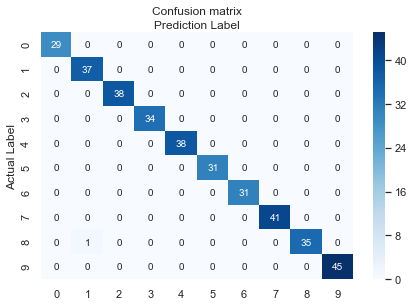

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix_adjust(confusion_matrix(y_test,y_pred), classes=digits.target_names,normalize= False,  title='Confusion matrix')

In [78]:
print(digitsc.predict(x[-28].reshape(1,-1)))

[5]


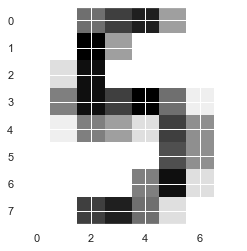

In [79]:
plt.imshow(digits.images[-28], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

[8]


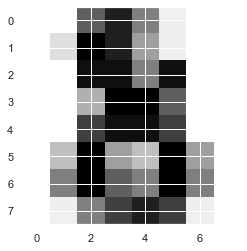

In [80]:
print(digitsc.predict(x[-1].reshape(1,-1)))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

[9]


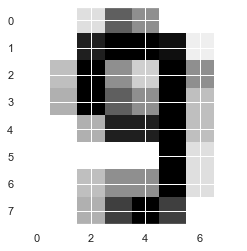

In [81]:
print(digitsc.predict(x[-2].reshape(1,-1)))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

[8]


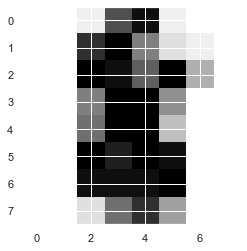

In [82]:
print(digitsc.predict(x[-3].reshape(1,-1)))
plt.imshow(digits.images[-3], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

[4]


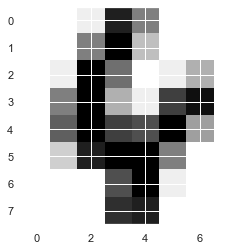

In [83]:
print(digitsc.predict(x[320].reshape(1,-1)))
plt.imshow(digits.images[320], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()